<a href="https://colab.research.google.com/github/Codeginner/machineLearning-task/blob/main/6th%20Week%20Tasks/K-Means%20Clustering%20menggunakan%20google%20colab%20dengan%20dataset%20Facebook%20Live%20sellers%20Thailand/kmeans_clustering_Facebook_Live_sellers_in_Thailand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gilman Muslih Z

1103201075

In [33]:
from google.colab import drive # import drive ke dalam environment google colab
import pandas as pd # import pandas sebagai pd untuk melakukan pengolahan data

# mount google drive untuk mengakses dataset yang ada di google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# memasukan path dataset ke dalam variabel "fp"
fp = '/content/drive/MyDrive/Dataset/Live.csv'

# enggunakan Pandas untuk membaca dataset CSV yang terletak di path yang disimpan dalam variabel "fp"
df = pd.read_csv(fp)

# menampilkan lima baris pertama dari dataset untuk melihat contoh data
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [35]:
# menampilkan summary dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [36]:
# mengecek missing value dari dataset
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Dapat dilihat, terdapat 4 kolom yang redundan pada dataset dan kolom-kolom tersebut harus di-drop sebelum melakukan proses lebih lanjut

In [37]:
# drop kolom yang redundan
try:
  df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
except:
  print("kolom-kolom sudah di-drop sebelumnya")

In [38]:
# melihat kembali summary dari dataset yang telah dihapus kolom redundannya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [39]:
# melihat ringkasan statistik dari variabel numerik
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [40]:
# melihat nilai unik dalam kolom 'status_id'
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [41]:
# menampilkan berapa banyak variasi yang ada dalam kolom 'status_id'
len(df['status_id'].unique())

6997

variabel status_id tidak dapat digunakan karena total instances pada dataset adalah 7050 sedangkan nilai yang unik pada variabel status_id hanya sebanyak 6997

In [42]:
# melihat nilai unik dalam kolom 'status_published'
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [43]:
# menampilkan berapa banyak variasi yang ada dalam kolom 'status_published'
len(df['status_published'].unique())

6913

sama seperti sebelumnya, kolom ini akan di-drop karena jumlah nilai unik tidak sesuai dengan jumlah instance pada dataset

In [44]:
# melihat nilai unik dalam kolom 'status_type'
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [45]:
# menampilkan berapa banyak variasi yang ada dalam kolom 'status_type'
len(df['status_type'].unique())

4

In [46]:
try:
  df.drop(['status_id', 'status_published'], axis=1, inplace=True)
except:
  print("kolom telah dihapus")

In [47]:
# melihat kembali summary dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [48]:
# melihat kembali 5 baris pertama dataset
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

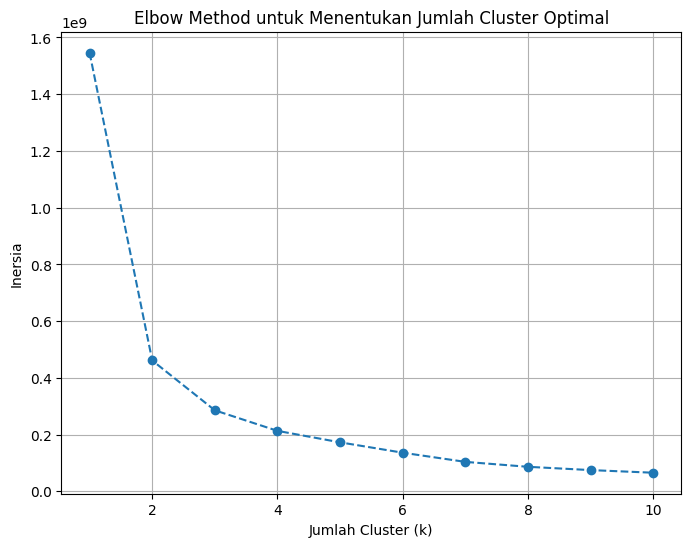

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # import modul KMeans  untuk mengimplementasikan algoritma K-Means Clustering
from sklearn.preprocessing import LabelEncoder # import modul LabelEncoder dari library scikit-learn untuk mengkodekan label

# membuat objek LabelEncoder yang akan digunakan untuk mengubah data kategori menjadi numerik
label_encoder = LabelEncoder()

# menggunakan LabelEncoder untuk mengkodekan kolom 'status_type' menjadi nilai numerik
df['status_type'] = label_encoder.fit_transform(df['status_type'])

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['status_type', 'num_shares', 'num_likes']]

# Inisialisasi list untuk menyimpan nilai inersia
inertia = []

# Lakukan analisis klaster dengan k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Visualisasi elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


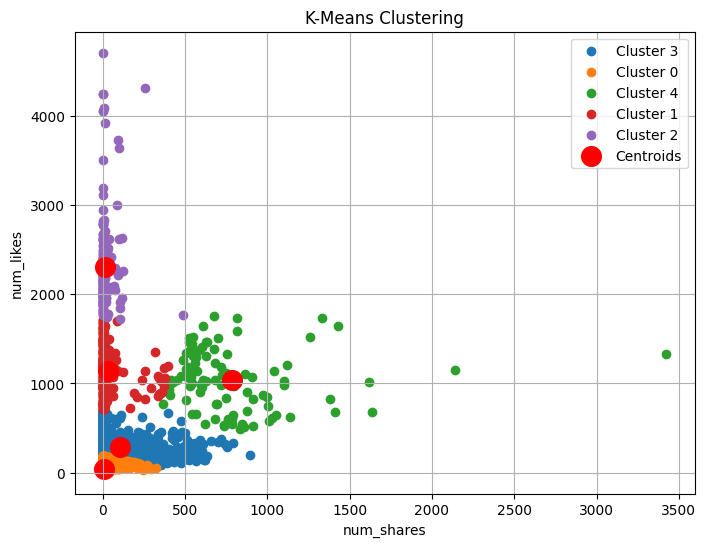

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['status_type', 'num_shares', 'num_likes']]

# Membuat model K-Means Clustering dengan jumlah cluster=5
kmeans = KMeans(n_clusters=5, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Visualisasi berdasarkan label
plt.figure(figsize=(8, 6))

# Visualisasi klaster
for label in df['label'].unique():
    plt.scatter(data[df['label'] == label]['num_shares'], data[df['label'] == label]['num_likes'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')
plt.xlabel('num_shares')
plt.ylabel('num_likes')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


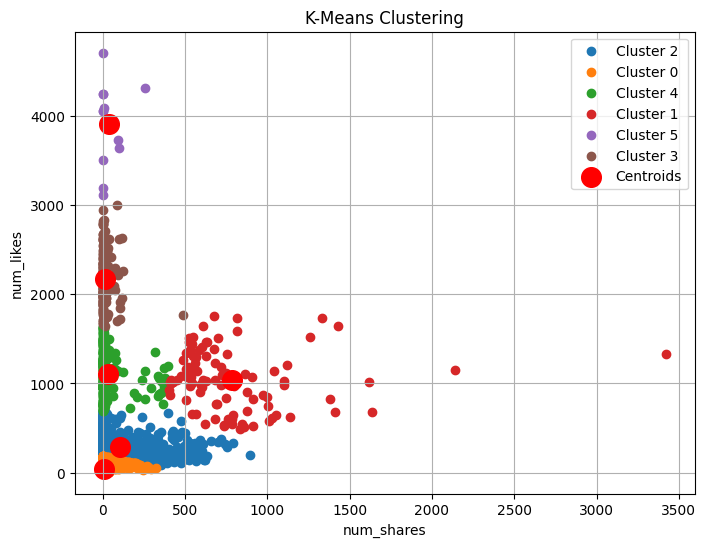

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['status_type', 'num_shares', 'num_likes']]

# Membuat model K-Means Clustering dengan jumlah cluster=6
kmeans = KMeans(n_clusters=6, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Visualisasi berdasarkan label
plt.figure(figsize=(8, 6))

# Visualisasi klaster
for label in df['label'].unique():
    plt.scatter(data[df['label'] == label]['num_shares'], data[df['label'] == label]['num_likes'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')
plt.xlabel('num_shares')
plt.ylabel('num_likes')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score untuk k=2: 0.8553
Silhouette Score untuk k=3: 0.8085
Silhouette Score untuk k=4: 0.6394
Silhouette Score untuk k=5: 0.6420
Silhouette Score untuk k=6: 0.6426
Silhouette Score untuk k=7: 0.6897
Silhouette Score untuk k=8: 0.6629
Silhouette Score untuk k=9: 0.6550
Silhouette Score untuk k=10: 0.6571


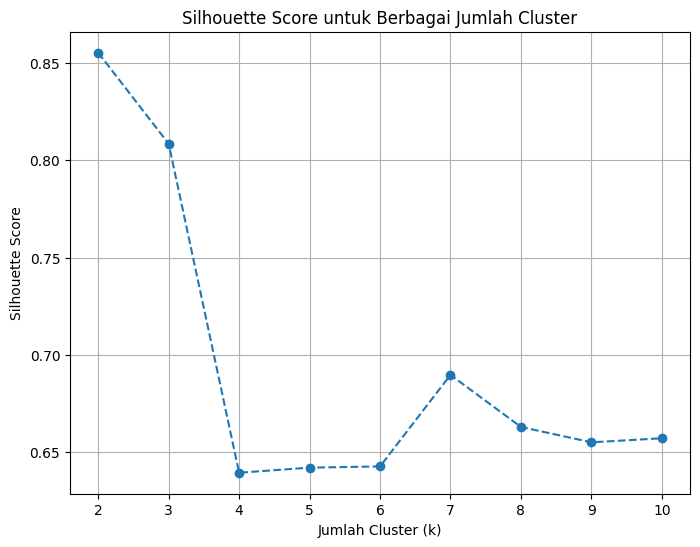

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['status_type', 'num_shares', 'num_likes']]

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Menghitung Silhouette Score untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil Silhouette Score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index untuk k=2: 0.4722
Davies-Bouldin Index untuk k=3: 0.5791
Davies-Bouldin Index untuk k=4: 0.7433
Davies-Bouldin Index untuk k=5: 0.7750
Davies-Bouldin Index untuk k=6: 0.6956
Davies-Bouldin Index untuk k=7: 0.6481
Davies-Bouldin Index untuk k=8: 0.6083
Davies-Bouldin Index untuk k=9: 0.6170
Davies-Bouldin Index untuk k=10: 0.6919


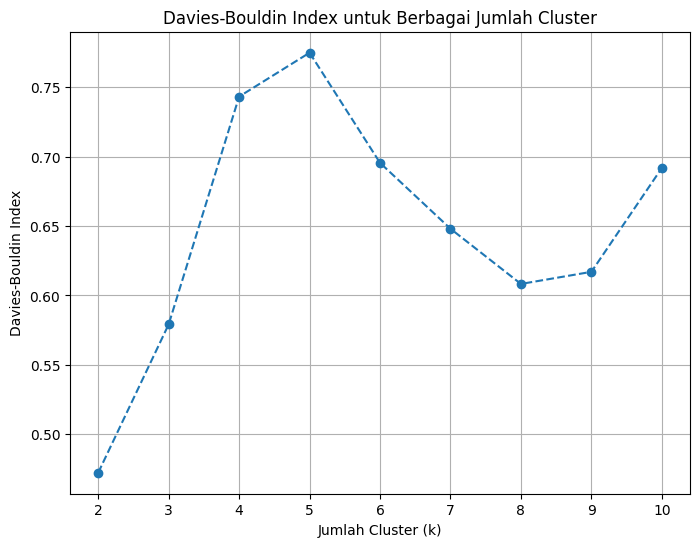

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score # import metode davies_bouldin_score untuk mengukur nilai Davies-Bouldin untuk hasil klastering

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['status_type', 'num_shares', 'num_likes']]

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Menghitung Davies-Bouldin Index untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index
for k, score in zip(range(2, 11), dbi_scores):
    print(f"Davies-Bouldin Index untuk k={k}: {score:.4f}")

# Visualisasi Davies-Bouldin Index
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), dbi_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index untuk Berbagai Jumlah Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index untuk k=2: 16569.3297
Calinski-Harabasz Index untuk k=3: 15543.8690
Calinski-Harabasz Index untuk k=4: 14676.9137
Calinski-Harabasz Index untuk k=5: 13994.7338
Calinski-Harabasz Index untuk k=6: 14570.2943
Calinski-Harabasz Index untuk k=7: 16278.8205
Calinski-Harabasz Index untuk k=8: 16949.5189
Calinski-Harabasz Index untuk k=9: 17255.5146
Calinski-Harabasz Index untuk k=10: 17609.2919


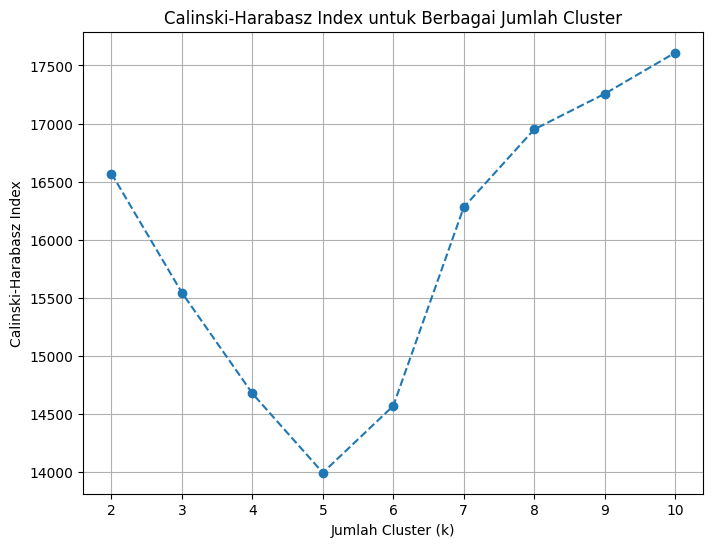

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score # import metode calinski_harabasz_score dari Scikit-learn untuk mengukur nilai Calinski-Harabasz untuk hasil klastering

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['status_type', 'num_shares', 'num_likes']]

# Inisialisasi list untuk menyimpan nilai Calinski-Harabasz Index
ch_scores = []

# Menghitung Calinski-Harabasz Index untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch = calinski_harabasz_score(data, labels)
    ch_scores.append(ch)

# Menampilkan hasil Calinski-Harabasz Index
for k, score in zip(range(2, 11), ch_scores):
    print(f"Calinski-Harabasz Index untuk k={k}: {score:.4f}")

# Visualisasi Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ch_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index untuk Berbagai Jumlah Cluster')
plt.grid(True)
plt.show()
